In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

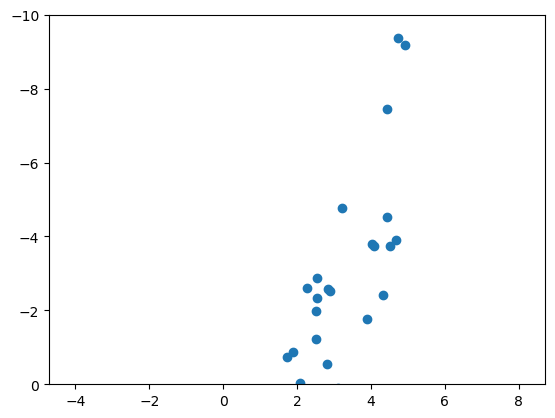

In [225]:
rng = np.random.RandomState(45)

x = 10 * rng.rand(100)
y = -4 * x + 5 + 10*rng.rand(100)
fig, ax = plt.subplots()

ax.scatter(x, y)
ax.axis('equal')

ax.set_xlim(-2,6)
ax.set_ylim(0,-10)
plt.show()

In [168]:
print(x.min(), x.max(), x.mean(), x.std())

0.004867594752598903 9.994791511322937 4.98181041879599 2.8721892167501974


In [169]:
print(y.min(), y.max(), y.mean(), y.std())

3.6609234371455486 100.94945283561401 51.602522523179346 26.800703894096976


In [170]:
def get_slope(point_1,point_2):
    range_x = point_2[0] - point_1[0]
    range_y = point_2[1] - point_1[1]
    slope = range_y/range_x

    return slope

In [171]:
def get_middle_point(point_1, point_2):
    mean_x = np.array(point_2[0],point_1[0]).mean()
    mean_y = np.array(point_2[1],point_1[1]).mean()
    return (mean_x, mean_y) 

In [172]:
def find_parameters(x, y, n_iter):
    points = list(zip(x, y))
    
    points_x_sorted = sorted(points, key= lambda x: x[0])
    points_y_sorted = sorted(points, key= lambda x: x[1])
    slopes_list = [] 
 
    center_x = 0
    center_y = 0
    for i in range(len(points_x_sorted)):
        point_1, point_2 = points_x_sorted[i],points_x_sorted[(i+1)*-1]
        
        slopes_list.append(get_slope(point_1, point_2))
        
        center_point = get_middle_point(point_1, point_2)
  
        center_x += center_point[0]
        center_y += center_point[1]
        
        if i == n_iter:
            break
            
    center_x /= n_iter
    center_y /= n_iter
    
    slopes_list = np.array(slopes_list)
    slope = slopes_list.mean()
    
    center_point = (center_x, center_y)
    
    intercept =  center_y - slope * center_x

    print('Slope:', slope, 'Intercept:', intercept)

In [227]:
find_parameters(x,y,20)

Slope: -3.953887457343794 Intercept: 10.074729509036583
